# Import Library

In [1]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd
# Import LabelEncoder dari sklearn untuk mengubah label kategori menjadi angka
from sklearn.preprocessing import LabelEncoder
# Import train_test_split dari sklearn untuk membagi dataset menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Import MinMaxScaler dari sklearn untuk normalisasi nilai fitur ke dalam rentang tertentu
from sklearn.preprocessing import MinMaxScaler
# Import DecisionTreeClassifier dari sklearn untuk membuat model pohon keputusan
from sklearn.tree import DecisionTreeClassifier
# Import classification_report dan accuracy_score dari sklearn untuk evaluasi model
from sklearn.metrics import classification_report, accuracy_score
# Import plot_tree dari sklearn.tree dan matplotlib.pyplot untuk membuat visualisasi pohon keputusan
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Membaca Data

In [2]:
csgo = pd.read_csv('K03_counter_strike_2.csv')
csgo

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


# Preprocessing Data

In [3]:
le = LabelEncoder()
csgo['map'] = le.fit_transform(csgo['map'])
csgo['round_winner'] = le.fit_transform(csgo['round_winner'])

In [4]:
feat = csgo.drop('round_winner', axis=1)
target = csgo['round_winner']

# Latih Data

In [5]:
feat_train, feat_test, target_train, target_test = train_test_split(feat, target, test_size=0.2, random_state=42)

In [6]:
skala = MinMaxScaler()
feat_train = skala.fit_transform(feat_train)
feat_test = skala.transform(feat_test)

In [7]:
model_tree = DecisionTreeClassifier()
model_tree.fit(feat_train, target_train)

DecisionTreeClassifier()

In [8]:
target_predict = model_tree.predict(feat_test)

# Akurasi

In [9]:
print("Akurasi:", accuracy_score(target_test, target_predict))
print("Klasifikasi:", classification_report(target_test, target_predict))

Akurasi: 0.855
Klasifikasi:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       156
           1       0.89      0.87      0.88       244

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



# Visualisasi Data

In [10]:
f = model_tree.feature_importances_
feat_names = feat.columns
importance_df = pd.DataFrame({'feature': feat_names, 'importance': f})
importance_df = importance_df.sort_values('importance', ascending=False)

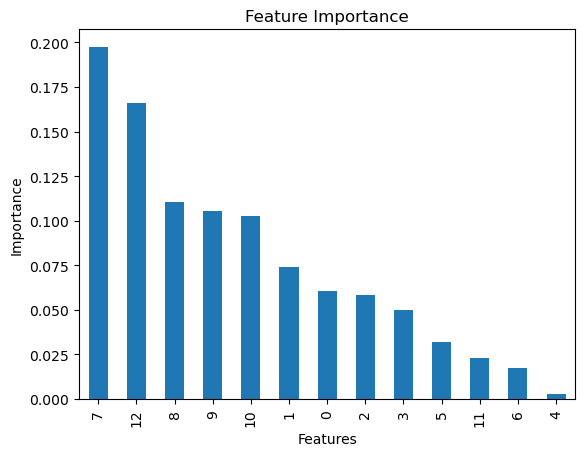

In [13]:
importance_df['importance'].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

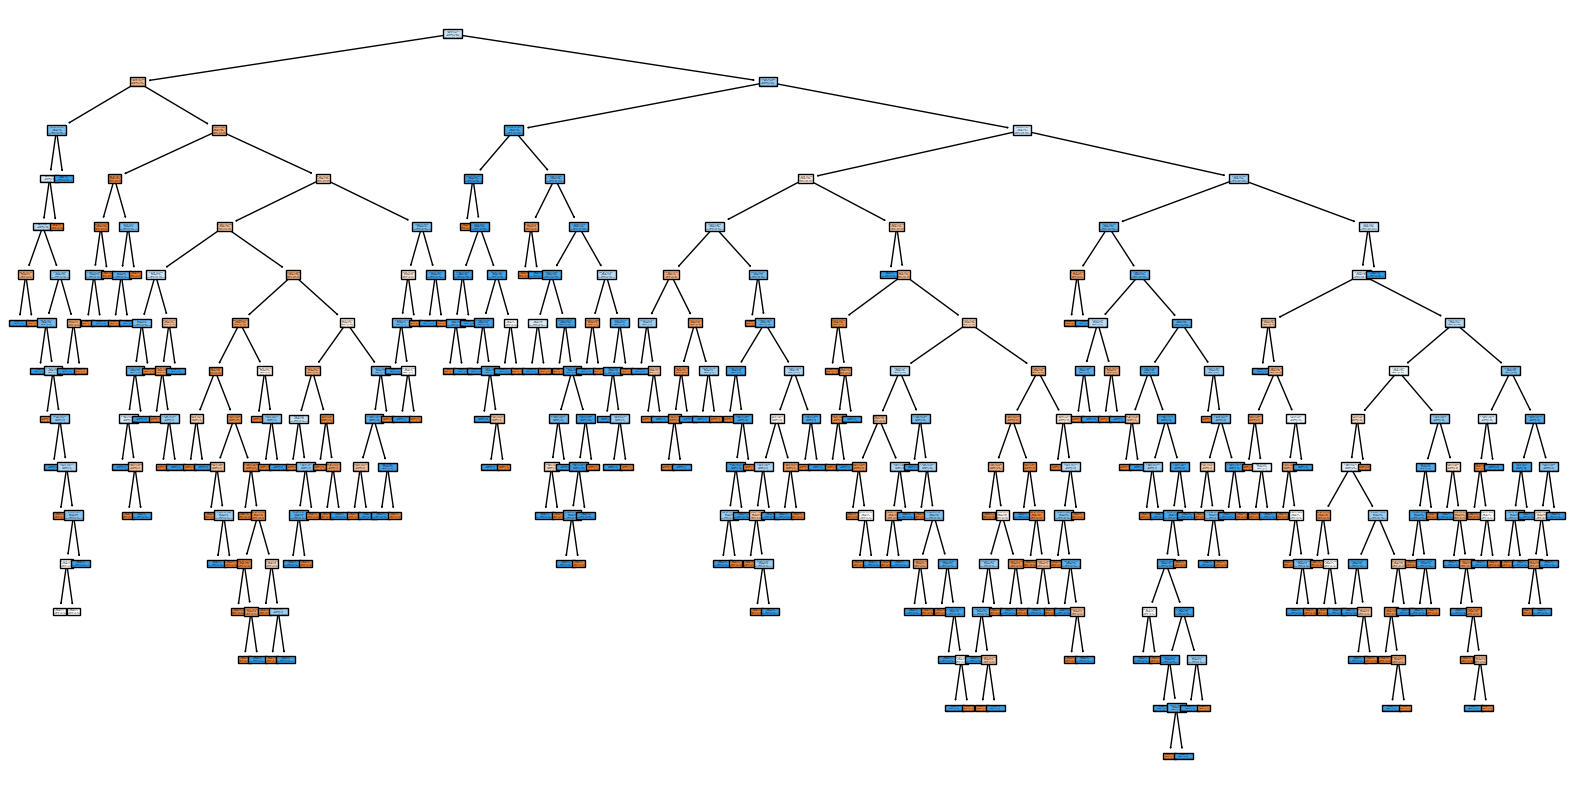

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree, filled=True, feature_names=feat.columns, class_names=['Terrorist', 'Counter-Terrorist'])
plt.show()